In [1]:
from googleapiclient.discovery import build

In [1]:
import pandas as pd
import seaborn as sns

In [3]:
api_key = 'Your-API-KEY'
channel_ids = ['UCnz-ZXXER4jOvuED5trXfEA', #techTFQ
               'UCLLw7jmFsvfIVaUFsLs8mlQ', #Luke
               'UCiT9RITQ9PW6BhXK0y2jaeg', # Ken Jee
               'UC7cs8q-gJRlGwj4A8OmCmXg', # Alex the Analyst
               'UC2UXDak6o7rBm23k3Vv5dww', # Tina Huang
              ]
youtube = build('youtube', 'v3', developerKey=api_key)

In [14]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
                part = 'snippet, contentDetails,statistics',
                id =','.join(channel_ids))
    response = request.execute()
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                   playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    return all_data

In [15]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [16]:
channel_data = pd.DataFrame(channel_statistics)

In [17]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Tina Huang,674000,31290700,224,UU2UXDak6o7rBm23k3Vv5dww
1,techTFQ,323000,17970465,138,UUnz-ZXXER4jOvuED5trXfEA
2,Ken Jee,261000,9106061,287,UUiT9RITQ9PW6BhXK0y2jaeg
3,Alex The Analyst,851000,38764271,320,UU7cs8q-gJRlGwj4A8OmCmXg
4,Luke Barousse,464000,22937863,158,UULLw7jmFsvfIVaUFsLs8mlQ


In [9]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
dtype: object

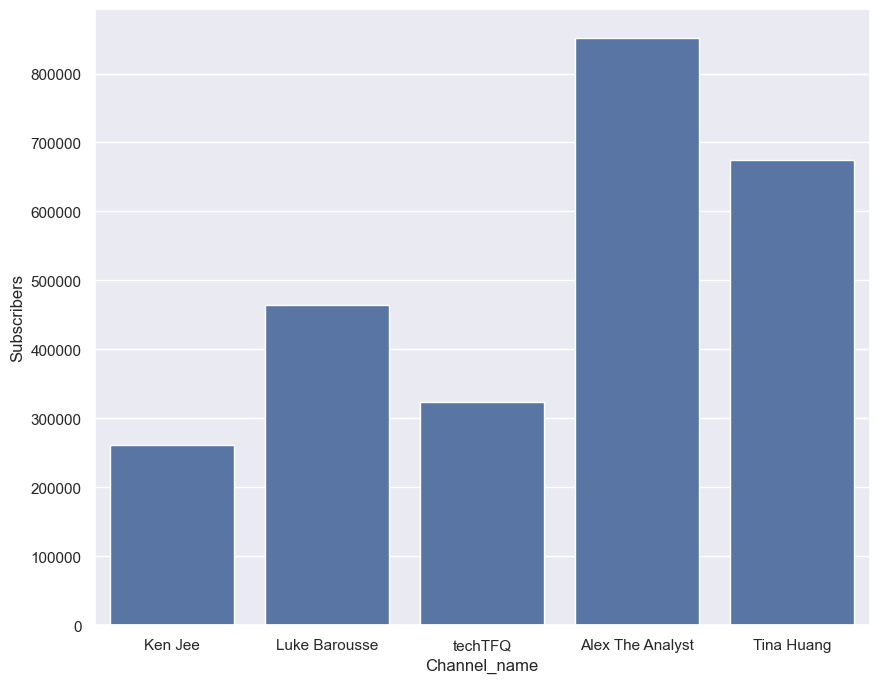

In [11]:
# sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='Channel_name', y ='Subscribers', data=channel_data)

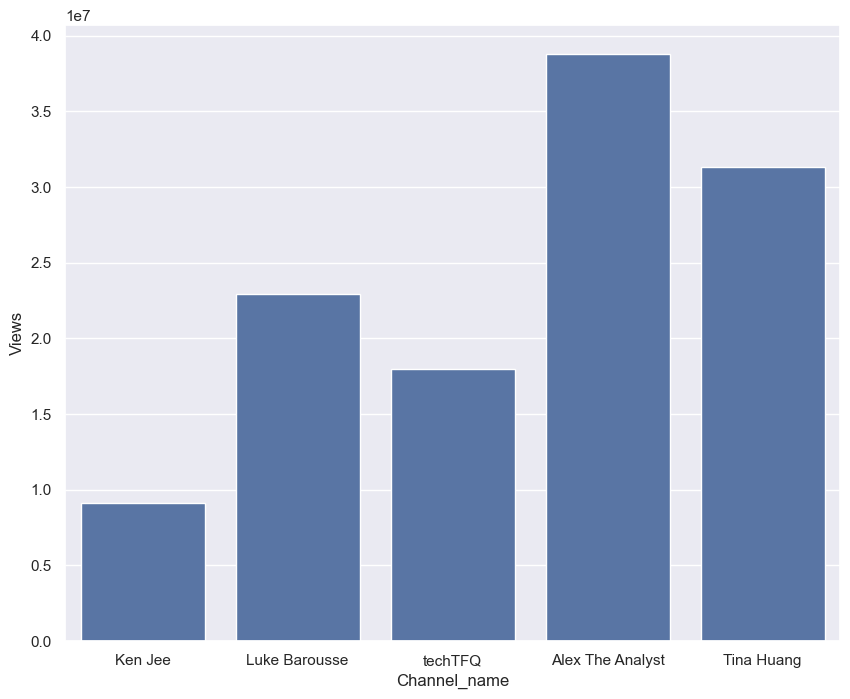

In [12]:
ax = sns.barplot(x='Channel_name', y ='Views', data=channel_data)

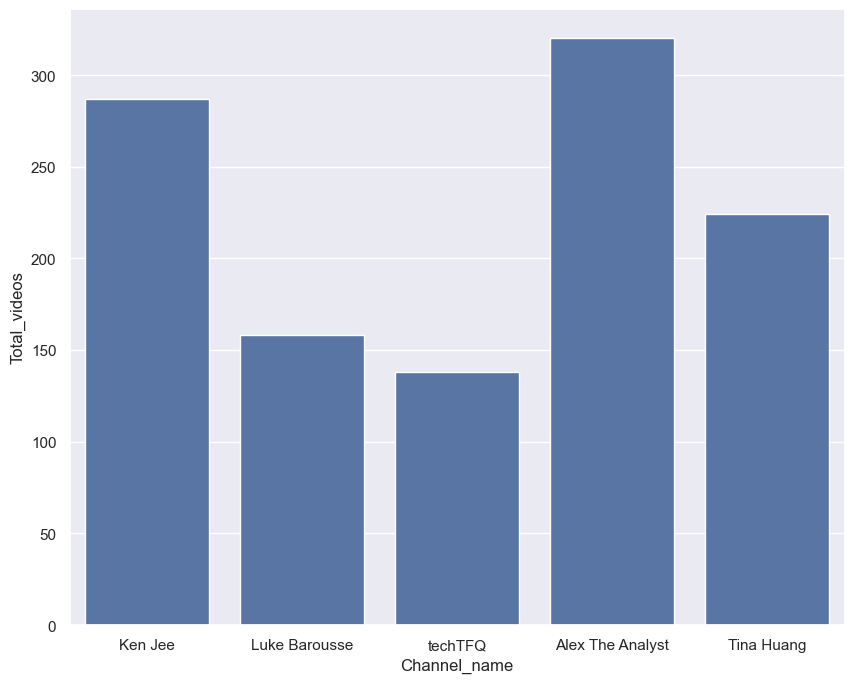

In [13]:
ax = sns.barplot(x='Channel_name', y ='Total_videos', data=channel_data)

# Function to get video ids

In [18]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Ken Jee', 'playlist_id'].iloc[0]

In [28]:
def get_video_ids(youtube, playlist_id):
    request=youtube.playlistItems().list(
        part='contentDetails',
        playlistId = playlist_id,
        maxResults = 50)
    response = request.execute()
    video_ids = []
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
    next_page_token = response.get('nextPageToken')
    more_pages = True
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request=youtube.playlistItems().list(
                      part='contentDetails',
                      playlistId = playlist_id,
                      maxResults = 50,
                      pageToken = next_page_token)
            response = request.execute()
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token = response.get('nextPageToken')
    return video_ids



In [29]:
video_ids = get_video_ids(youtube, playlist_id)

In [30]:
video_ids

['QEDZaBMozIo',
 'Hyhfa7z0jTk',
 'L5Cis5bOwgw',
 'M1I5HlzQges',
 'T_-0l0ORi5I',
 'w13zJB_jyBI',
 'oZ9rMrqyTbI',
 '6BrYKdqq4uA',
 '1dAvbIMrLos',
 'lqYxmYMkfK8',
 '-JTU734oMfk',
 'HVpbmu7rFYE',
 'NQQ3DRdXAXE',
 'xpi-M2j3NmE',
 'X07w7QFoLpc',
 'RRnThAtKuq0',
 'r3zOpjEOkgE',
 's-XYFEzy9Wc',
 'iBh1wl4o6V4',
 'L6lXKdP4Qbg',
 'xGDl6rlBygU',
 'SY6y6Y8C594',
 '1RUj2aLQx8I',
 'MkzZXSw1Glk',
 '9neDFXTxKxA',
 'UaNNVukM27g',
 '3lN0-S3symM',
 'M-AN8eWLxms',
 'MXFZhbvQqM8',
 '54n61XjKifI',
 'pyWYIRR8rrE',
 'onwRfbt--cw',
 'u6P23ouSYhA',
 'RMMVuvS7S_g',
 '5AwbPAV8FS0',
 'A2OQgU0IRNo',
 'x5Q_nrIqFik',
 '7ja2ELBVMlU',
 'Z2MyLQa_vVw',
 'JTlB9fwYRk0',
 'OJDf_fTENJ4',
 'nqCkdqhV-JY',
 'b8t8lDL13sg',
 't6CD1EwU5kc',
 'eIxHe45hzhQ',
 '3NJOWWvNK3I',
 '4_VtMWJSo1o',
 'OybXWl3IWvI',
 'nRHPQ5ZeB5Y',
 '0JWC4M0Qhqc',
 'oNvyvYGw5n4',
 'GaZRuchRCyw',
 'EBjYqC3aNTA',
 'QMP858aZcow',
 '0ItYIoOrrUs',
 'KzTFoUbThvM',
 'bBJd0oPdNak',
 'Yk-unX4KnV4',
 'z0_xrtFdFj8',
 'vVpkXEIn-q0',
 'aipz4p7GDL4',
 'iPdO9MwdcLE',
 'YPph59

# Function to get video details

In [38]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part='snippet,statistics',
            id=','.join(video_ids[i:i+50]))
        response = request.execute()
        for video in response['items']:
            video_stats = dict(
                Title=video['snippet']['title'],
                Published_date=video['snippet']['publishedAt'],
                Views=video['statistics'].get('viewCount', 'N/A'),
                Likes=video['statistics'].get('likeCount', 'N/A'),
                Comments=video['statistics'].get('commentCount', 'N/A')
            )
            all_video_stats.append(video_stats)
    return all_video_stats

In [40]:
video_details = get_video_details(youtube, video_ids)

In [41]:
video_data = pd.DataFrame(video_details)

In [46]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['Comments'] = pd.to_numeric(video_data['Comments'])
video_data

,Title,Published_date,Views,Likes,Comments,published_date
0,Moving On,2024-04-22,9806,440,90,2024-04-22
1,How Does ChatGPT Image Analysis Do on an IQ Test?,2023-11-30,3052,75,24,2023-11-30
2,A Data Dream Come True,2023-11-17,2382,95,23,2023-11-17
3,The Death of the Full-Time Job (Rise of the Co...,2023-09-22,6354,418,77,2023-09-22
4,How to Survive a Down Data Job Market,2023-09-05,17542,584,63,2023-09-05
...,...,...,...,...,...,...
282,How to Simulate NBA Games in Python,2018-11-19,18798,411,50,2018-11-19
283,Should You Get A Masters in Data Science?,2018-11-14,20839,303,133,2018-11-14
284,How I Became A Data Scientist From a Business ...,2018-11-12,6605,196,23,2018-11-12
285,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,9244,193,17,2018-07-10


In [47]:
top10_videos = video_data.sort_values(by='Views', ascending=False).head(10)

In [48]:
top10_videos

,Title,Published_date,Views,Likes,Comments,published_date
189,How I Would Learn Data Science (If I Had to St...,2020-05-08,1402801,48877,1986,2020-05-08
165,Beginner Kaggle Data Science Project Walk-Thro...,2020-07-17,384181,8166,444,2020-07-17
210,The Best Free Data Science Courses Nobody is T...,2020-03-09,350918,21217,621,2020-03-09
69,How I Would Learn Data Science in 2022 (If I H...,2021-12-27,345851,14995,531,2021-12-27
216,3 Proven Data Science Projects for Beginners (...,2020-02-17,335165,17973,525,2020-02-17
202,Data Science Project from Scratch - Part 1 (Pr...,2020-04-03,214543,5301,173,2020-04-03
255,The Projects You Should Do To Get A Data Scien...,2019-07-30,155704,5773,251,2019-07-30
215,How to Set Up Your Data Science Environment (A...,2020-02-21,142807,2618,97,2020-02-21
186,How to Make A Data Science Portfolio Website w...,2020-05-15,141112,4612,194,2020-05-15
102,Why You Probably Won't Become a Data Scientist,2021-04-09,139383,4035,470,2021-04-09


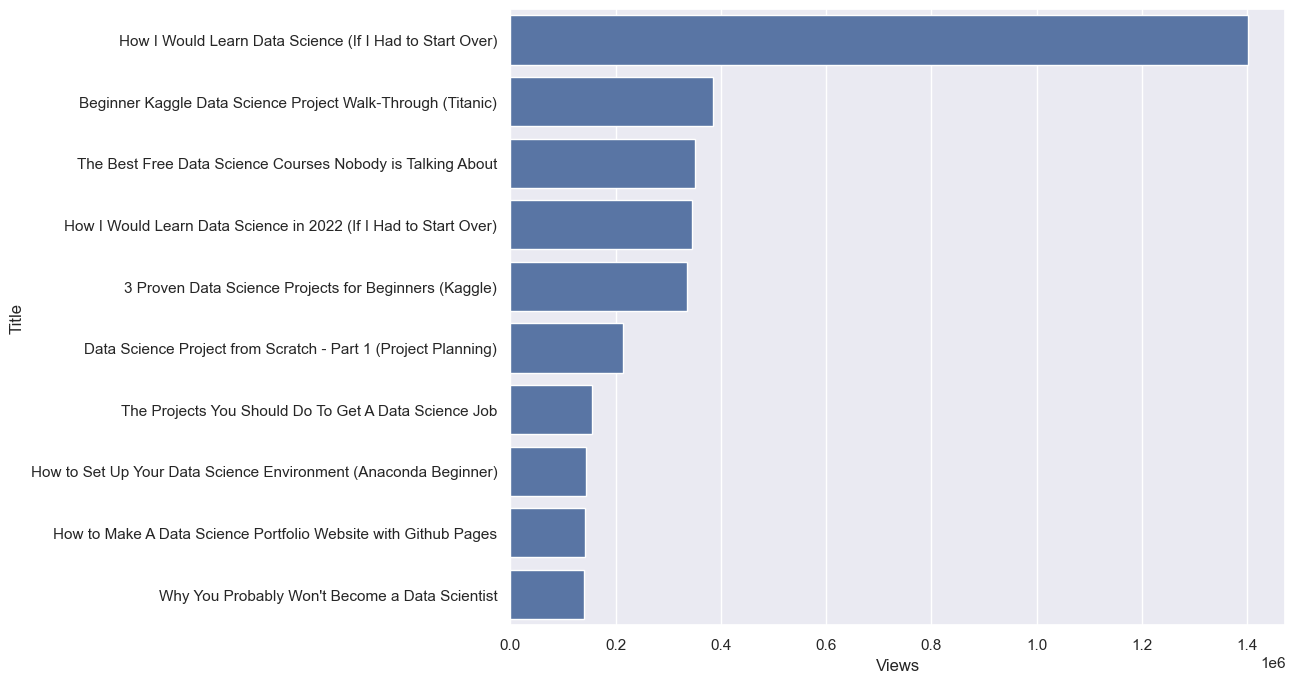

In [51]:
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos)

In [54]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [55]:
video_data

,Title,Published_date,Views,Likes,Comments,published_date,Month
0,Moving On,2024-04-22,9806,440,90,2024-04-22,Apr
1,How Does ChatGPT Image Analysis Do on an IQ Test?,2023-11-30,3052,75,24,2023-11-30,Nov
2,A Data Dream Come True,2023-11-17,2382,95,23,2023-11-17,Nov
3,The Death of the Full-Time Job (Rise of the Co...,2023-09-22,6354,418,77,2023-09-22,Sep
4,How to Survive a Down Data Job Market,2023-09-05,17542,584,63,2023-09-05,Sep
...,...,...,...,...,...,...,...
282,How to Simulate NBA Games in Python,2018-11-19,18798,411,50,2018-11-19,Nov
283,Should You Get A Masters in Data Science?,2018-11-14,20839,303,133,2018-11-14,Nov
284,How I Became A Data Scientist From a Business ...,2018-11-12,6605,196,23,2018-11-12,Nov
285,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,9244,193,17,2018-07-10,Jul


In [58]:
videos_per_month = video_data.groupby('Month', as_index=False).size()

In [59]:
videos_per_month

,Month,size
0,Apr,23
1,Aug,27
2,Dec,20
3,Feb,25
4,Jan,29
5,Jul,27
6,Jun,20
7,Mar,32
8,May,24
9,Nov,22


In [60]:
sort_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [61]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered= True)

In [63]:
videos_per_month = videos_per_month.sort_index()

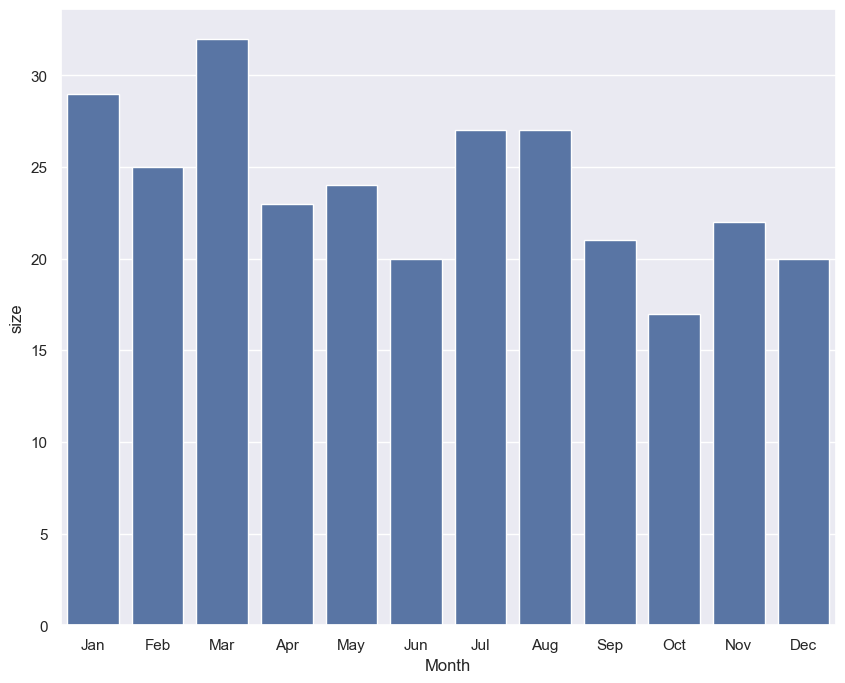

In [64]:
ax2 = sns.barplot(x='Month', y='size', data =videos_per_month)

In [65]:
video_data.to_csv('Video_Details(Ken Jee).csv')